**General Idea:**    
It simply classifies objects based on **feature similarity**: Find k individuals in our data “most similar” to the new individual in terms of predictor values;  

For classification, use voting.  
For regression, use averaging or weighted averaging of target values of these k individuals to predict target for our new individual.  

**Inference Algorithms**  
Given an unclassified data,
1.  **Measure** the distance (Euclidian, Manhattan, Minkowski or Weighted) from the new data to all others data that is already classified: 
     + Sort individuals from smallest $d_i$ to largest, where $d_i$ be the distance of our new individual from the $i$-th individual in our training data
     + If we denote the targets in the sorted list by y(1); : : : ; y(n), then y(1) is observed target for closest individua while y(n) is observed target for furthest individual
2. Use the k individuals with smallest $d_i$ to predict the label, i.e., $\hat{y}$ = f(y(1),...,y(k))
     + **Gets** the K(K is a parameter that you define) smaller distances;
     + Check the list of classes had the shortest distance and **count** the amount of each class that appears;
     + **Takes** as correct class with the class that appeared the most times;





**Advantages**  
* simple to understand and easy to implement.
* Zero to little training time.(k-NNs does not produce a model)
* Works easily with multiclass data sets.
* Has good predictive power.
* Does well in practice.
<!--  -->
* Very weak assumptions about data
* Efficient learning in high dimensions
* Easily handle continuous and categorical variables
* Instance-based intepretation

**Disadvantages**  
* Computationally expensive testing phase.
* Can have skewed class distributions (If a particular class is very frequent during the training phase, it will tend to prevail the majority voting of the new example).
* **Curse of dimensionality**: The accuracy can be decreased when it comes to high-dimension data. The reason is that there is a little difference between the nearest and farthest neighbor.
<!--  -->
* Lots of parameters to tune
    * neighborhood size(How many neighbours ( $k$ ) to use?)
    * Distance function(How to measure "nearest"?)
    * Kernel weighting function(How to average or weight the neighbours)  
    $\hat{y}^{\prime}=\frac{1}{k} \sum_{i=1}^{k} g\left(y^{(i)}\right)$ where $g(d)$ is a function that gets smaller as $d$ gets larger
    * Should all predictors be treated the same?
* Predictor selection is not straightforward
* No general intepretation



**How to choose k?**  
The training error rate and the validation error rate are two parameters to access on different K-value.

**How to choose parameters?**  
Use leave-one-out cross-validation
For each combination of parameter choices:
1. Predict each example $y_{i}$ using $k-\mathrm{NN}$
2. Accumulate error in predicting $y_{i}$  

Choose the parameters that minimise this score

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Load some digit data.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

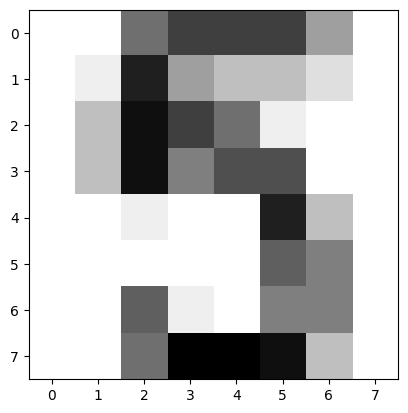

In [3]:
# Load the digits dataset: digits
digits = datasets.load_digits()
print(digits.keys())
print(digits.DESCR)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [5]:
# Create feature and target arrays
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))

# check the accuracy of our model
knn.score(X_test, y_test)

Test set prediction:
 [1 0 1 5 4 1 4 9 2 9 2 0 8 7 6 0 6 1 6 8 1 2 0 7 3 2 9 7 2 0 2 1 4 2 6 0 7
 3 4 9 8 6 5 5 6 8 7 5 7 9 3 4 5 0 8 8 8 0 9 9 8 9 5 1 4 6 9 1 4 1 1 6 4 5
 6 3 5 6 9 3 5 7 6 9 3 3 9 5 0 3 3 7 7 7 5 5 9 4 9 5 1 4 2 7 1 7 7 5 2 2 1
 0 1 6 0 3 1 0 8 9 5 4 1 6 6 2 6 0 4 5 0 6 9 2 0 0 9 0 2 1 3 7 3 8 2 4 1 8
 9 1 6 8 2 1 7 1 7 9 7 7 7 7 3 7 4 2 0 2 4 8 6 0 8 4 5 9 6 3 6 0 8 9 7 5 0
 0 4 4 0 5 1 7 3 8 1 0 5 0 4 5 8 3 5 4 1 7 9 5 7 9 9 0 2 6 2 3 2 1 8 7 6 7
 3 0 6 7 9 3 4 8 7 1 2 5 9 9 3 5 7 3 3 4 9 1 4 3 6 6 1 1 3 6 9 2 2 4 8 5 5
 3 8 1 4 5 6 6 0 3 0 3 5 1 7 8 9 4 5 7 0 1 4 8 0 9 9 2 3 2 4 3 4 4 1 7 4 5
 0 4 1 3 4 5 4 4 5 1 3 2 7 2 5 7 6 4 4 7 8 7 5 2 0 3 3 4 4 2 8 9 8 7 4 4 1
 7 9 2 0 3 1 4 5 8 5 6 5 3 9 1 0 0 1 3 6 0 2 5 5 0 6 7 5 3 6 9 1 7 8 0 3 9
 6 7 6 1 8 6 4 8 4 3 7 6 7 5 8 0 4 3 2 2 8 5 7 8 1 0 3 2 1 1 3 3 4 6 0 3 8
 1 6 6 6 8 8 7 5 2 2 6 8 6 9 4 5 7 4 0 2 3 3 5 6 8 2 1 8 1 0 7 2 1 5 8 9 0
 4 3 3 8 1 1 3 9 5 5 9 6 9 2 9 6 0 8 2 1 7 8 0 2 7 9 6 6 0 7 0 1 2 9 0 6 3
 6 

0.975925925925926

## Plot model complexity curves
Model complexity:  
Larger k = smoother decision boundary = less complex model  
Overfitting: complex models run the risk of being sensitive to noise in the specific data rather than reflecting the genral trend in the data  
Underfitting  
Sweet spot

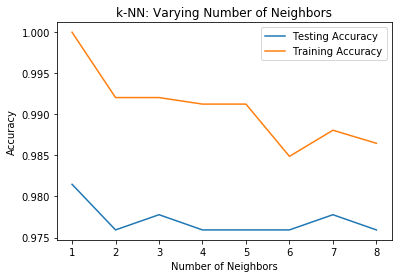

In [28]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()